# Primer practico diplodatos

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
import scipy

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
seaborn.set_context(context='talk', font_scale=1.2)

In [5]:
dataset = pandas.read_csv("hfi_cc_2018.csv")

In [ ]:
dataset = pandas.read_csv(
    r'C:\Users\valen\Desktop\Google Drive\Diplomatura Ciencia de Datos\AyD Datos\DataSet\hfi_cc_2018.csv')

In [6]:
dataset.shape

(1458, 123)

In [7]:
dataset.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

In [8]:
dataset[:5]

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [10]:
dataset.columns  # Way too many columns!

important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

# 1)Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
Se calculan los rangos para todas las variables que no son categóricas

In [11]:

rangos={}
for col in important_cols:
    try:
        rangos[col]=numpy.ptp(dataset[col])
    except:
        pass
rangos        
        

{'year': 8,
 'pf_identity_legal': 10.0,
 'pf_identity_parental_marriage': 10.0,
 'pf_identity_parental_divorce': 10.0,
 'pf_identity_parental': 10.0,
 'pf_identity_sex_male': 10.0,
 'pf_identity_sex_female': 10.0,
 'pf_identity_sex': 10.0,
 'pf_identity_divorce': 10.0,
 'pf_identity': 10.0,
 'ef_score': 6.31,
 'ef_rank': 161.0,
 'hf_score': 5.360486062,
 'hf_rank': 161.0}

# 2) Obtener media, mediana y desviación estándar de las variables pf_identity 
# y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. 
# ¿Tiene sentido calcular la moda? 

In [32]:
print("Moda pf_identity: ",scipy.stats.mode(dataset["pf_identity"],nan_policy="omit")[0][0],". Se repite ",scipy.stats.mode(dataset["pf_identity"],nan_policy="omit")[1][0]," veces")  
print("Mediana pf_identity: ",numpy.nanmedian(dataset["pf_identity"]) )
print("Media pf_identity: ",numpy.nanmean(dataset["pf_identity"]))
print("Desviación estándar pf_identity: ",numpy.nanstd(dataset["pf_identity"]),"/n")

print("Moda hf_score: ",scipy.stats.mode(dataset["hf_score"],nan_policy="omit")[0][0],". Se repite ",scipy.stats.mode(dataset["hf_score"],nan_policy="omit")[1][0]," veces")  
print("Mediana hf_score: ",numpy.nanmedian(dataset["hf_score"]) )
print("Media hf_score: ",numpy.nanmean(dataset["hf_score"]))
print("Desviación estándar hf_score: ",numpy.nanstd(dataset["hf_score"]))

Moda pf_identity:  10.0 . Se repite  601.0  veces
Mediana pf_identity:  9.166666667000001
Media pf_identity:  7.334179970968069
Desviación estándar pf_identity:  3.1583260555019637 /n
Moda hf_score:  7.5681402879999995 . Se repite  1.0  veces
Mediana hf_score:  6.923840432999999
Media hf_score:  6.993443755514514
Desviación estándar hf_score:  1.0254388834900923


# 5)¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos?
# ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

In [20]:
quartiles=numpy.nanquantile(dataset["hf_score"],[0.25,0.75])

rango_intercuartil=quartiles[1]-quartiles[0]

extremo_max, extremo_min = quartiles[1]+rango_intercuartil,quartiles[0]-rango_intercuartil

print("Cantidad de valores menores al extremo inferior: ",len(dataset[dataset["hf_score"]<extremo_min]) )


print("Cantidad de valores mayores al extremo superior: ",len(dataset[dataset["hf_score"]>extremo_max]) )

Cantidad de valores menores al extremo inferior:  19
Cantidad de valores mayores al extremo superior 0


In [21]:
# Para pf_identity

quartiles=numpy.nanquantile(dataset["pf_identity"],[0.25,0.75])

rango_intercuartil=quartiles[1]-quartiles[0]

extremo_max, extremo_min = quartiles[1]+rango_intercuartil,quartiles[0]-rango_intercuartil

print("Cantidad de valores menores al extremo inferior: ",len(dataset[dataset["pf_identity"]<extremo_min]) )

print("Cantidad de valores mayores al extremo superior: ",len(dataset[dataset["pf_identity"]>extremo_max]) )


Cantidad de valores menores al extremo inferior:  0
Cantidad de valores mayores al extremo superior:  0


# 1)Grafiquen la media de la variable pf_identity y hf_score a través de los años.


array(['Caucasus & Central Asia', 'East Asia', 'Eastern Europe',
       'Latin America & the Caribbean', 'Middle East & North Africa',
       'North America', 'Oceania', 'South Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

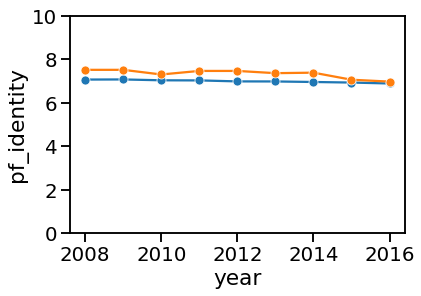

In [33]:

medias=pandas.DataFrame(columns=["year","pf_identity","hf_score"])
for anio in numpy.unique(dataset["year"]):

    media_hf=numpy.nanmean(dataset["hf_score"][dataset["year"]==anio])
    media_pf=numpy.nanmean(dataset["pf_identity"][dataset["year"]==anio])
    
    medias=medias.append({"year":anio,"hf_score":media_hf,"pf_identity":media_pf},ignore_index=True)
    
seaborn.lineplot(x="year",y="hf_score",data=medias,marker="o")
seaborn.lineplot(x="year",y="pf_identity",data=medias,marker="o")
plt.ylim(0,10)


